In [ ]:
# Web Scraper 
### @Author : Woojin Park
### @Copyright : 2020, Neolth NSF grant NLP project 
### @Email : woojinpa@andrew.cmu.edu 
### @Status : Production

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import requests
import json
import re
import time

In [44]:
def dateConvert(year,month,day) :
    day = dt.date(year,month,day)
    return int(day.strftime("%s"))

In [45]:
dateConvert(2016,5,22)

1463889600

In [46]:
dateConvert(2020,5,22)

1590120000

In [47]:
print(dt.datetime.fromtimestamp(1463889600))
print(dt.datetime.fromtimestamp(1590120000))

2016-05-22 00:00:00
2020-05-22 00:00:00


In [48]:
## Put the URL of Pushshift api
pushshift_reddit = "http://api.pushshift.io/reddit"

In [49]:
def fetchObjects(**kwargs):
    # Default paramaters for API query : will be used to requests.get(), for GET-style URL parameters
    params = {
        "sort_type":"created_utc",
        "sort":"asc",
        "size":1000, ##maximum size api can return
        "before" : dateConvert(2020,5,22) 
        }

    # Add additional paramters based on function arguments
    for key,value in kwargs.items():
        params[key] = value

    # Print API query paramaters
    print(params)

    # Set the type variable based on function input
    # The type can be "comment" or "submission", default is "comment"
    type = "comment"
    
    if 'type' in kwargs and kwargs['type'].lower() == "submission":
        type = "submission"
    
    # Perform an API request
    r = requests.get(pushshift_reddit + "/" + type + "/search/", params=params, timeout=30)

    # Check the status code successful or not
    if r.status_code == 200: #  200 means : http server response successfully 
        response = json.loads(r.text)
        data = response['data']
        sorted_data_by_id = sorted(data, key=lambda x: int(x['id'],36))
        
        return sorted_data_by_id

In [50]:
def extract_reddit_data(**kwargs):
    # Speficify the start timestamp
    max_created_utc = dateConvert(2016,5,22) 
    max_id = 0
    print("Scrap subreddit data from", dt.datetime.fromtimestamp(dateConvert(2016,5,22))," to ", \
                              dt.datetime.fromtimestamp(dateConvert(2020,5,22))) 
    # Open a file for JSON output
    file = open("submissions_selfimprovement.json","a")

    # While loop for recursive function
    while 1:
        nothing_processed = True
        # Call the recursive function
        objects = fetchObjects(**kwargs, after=max_created_utc)
        
        # Loop the returned data, ordered by date
        for object in objects:
            id = int(object['id'],36)
            if id > max_id:
                nothing_processed = False
                created_utc = object['created_utc']
                max_id = id
                if created_utc > max_created_utc: max_created_utc = created_utc
                # Output JSON data to the opened file
                print(json.dumps(object,sort_keys=True, ensure_ascii=True),file=file)
        
        # Exit if nothing happened
        if nothing_processed: return
        max_created_utc -= 1

        # Sleep a little before the next recursive function call
        time.sleep(.5)
    
# Start program by calling function with:
# 1) Subreddit specified
# 2) The type of data required (comment or submission)
extract_reddit_data(subreddit="selfimprovement", type="submission")

Scrap subreddit data from 2016-05-22 00:00:00  to  2020-05-22 00:00:00
{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'before': 1590120000, 'subreddit': 'selfimprovement', 'type': 'submission', 'after': 1463889600}
{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'before': 1590120000, 'subreddit': 'selfimprovement', 'type': 'submission', 'after': 1473318505}
{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'before': 1590120000, 'subreddit': 'selfimprovement', 'type': 'submission', 'after': 1481413477}
{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'before': 1590120000, 'subreddit': 'selfimprovement', 'type': 'submission', 'after': 1488198770}
{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'before': 1590120000, 'subreddit': 'selfimprovement', 'type': 'submission', 'after': 1494998670}
{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'before': 1590120000, 'subreddit': 'selfimprovement', 'type': 'submission', 'after': 1500924837}

In [51]:
with open('submissions_selfimprovement.json') as f:
    data = json.loads("[" +f.read().replace("}\n{", "},\n{") + "]")

In [52]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [53]:
data =pd.DataFrame(data)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44442 entries, 0 to 44441
Data columns (total 87 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   author                         44442 non-null  object 
 1   author_flair_css_class         0 non-null      object 
 2   author_flair_text              0 non-null      object 
 3   created_utc                    44442 non-null  int64  
 4   domain                         44442 non-null  object 
 5   full_link                      44442 non-null  object 
 6   gilded                         11117 non-null  float64
 7   id                             44442 non-null  object 
 8   is_self                        44442 non-null  bool   
 9   locked                         44442 non-null  bool   
 10  media_embed                    5098 non-null   object 
 11  num_comments                   44442 non-null  int64  
 12  over_18                        44442 non-null 

In [54]:
data.head(2)

author author_flair_css_class author_flair_text  created_utc  \
0   [deleted]                   None              None   1463891908   
1  star__lite                   None              None   1463894228   

                 domain                                          full_link  \
0  self.selfimprovement  https://www.reddit.com/r/selfimprovement/comme...   
1  self.selfimprovement  https://www.reddit.com/r/selfimprovement/comme...   

   gilded      id  is_self  locked media_embed  num_comments  over_18  \
0     0.0  4kh64z     True   False          {}             3    False   
1     0.0  4kha7m     True   False          {}             2    False   

                                           permalink  retrieved_on  score  \
0  /r/selfimprovement/comments/4kh64z/how_do_i_st...    1466478420      5   
1  /r/selfimprovement/comments/4kha7m/learning_to...    1466478473      3   

  secure_media_embed                                           selftext  \
0                 {}                                          [deleted]   
1                 {}  I've been on a huge self-improvement overhaul ...   

   stickied        subreddit subreddit_id thumbnail  \
0     False  selfimprovement     t5_2qmbm   default   
1     False  selfimprovement     t5_2qmbm      self   

                                          title  \
0      How do I stop myself from over reacting?   
1  Learning to be a better advocate for myself?   

                                                 url  author_created_utc  \
0  https://www.reddit.com/r/selfimprovement/comme...                 NaN   
1  https://www.reddit.com/r/selfimprovement/comme...        1.460535e+09   

  author_fullname post_hint preview  edited banned_by contest_mode spoiler  \
0             NaN       NaN     NaN     NaN       NaN          NaN     NaN   
1        t2_x4wf6       NaN     NaN     NaN       NaN          NaN     NaN   

  brand_safe  suggested_sort author_cakeday is_video  approved_at_utc  \
0        NaN             NaN            NaN      NaN              NaN   
1        NaN             NaN            NaN      NaN              NaN   

   banned_at_utc can_mod_post  thumbnail_height  thumbnail_width  view_count  \
0            NaN          NaN               NaN              NaN         NaN   
1            NaN          NaN               NaN              NaN         NaN   

  parent_whitelist_status whitelist_status is_crosspostable  num_crossposts  \
0                     NaN              NaN              NaN             NaN   
1                     NaN              NaN              NaN             NaN   

  pinned is_reddit_media_domain crosspost_parent crosspost_parent_list  \
0    NaN                    NaN              NaN                   NaN   
1    NaN                    NaN              NaN                   NaN   

  subreddit_type author_flair_richtext author_flair_type link_flair_richtext  \
0            NaN                   NaN               NaN                 NaN   
1            NaN                   NaN               NaN                 NaN   

  link_flair_text_color link_flair_type rte_mode  \
0                   NaN             NaN      NaN   
1                   NaN             NaN      NaN   

  author_flair_background_color author_flair_text_color send_replies  \
0                           NaN                     NaN          NaN   
1                           NaN                     NaN          NaN   

  no_follow  subreddit_subscribers is_original_content previous_visits  wls  \
0       NaN                    NaN                 NaN             NaN  NaN   
1       NaN                    NaN                 NaN             NaN  NaN   

   pwls media_only author_id link_flair_background_color is_meta gildings  \
0   NaN        NaN       NaN                         NaN     NaN      NaN   
1   NaN        NaN       NaN                         NaN     NaN      NaN   

  is_robot_indexable author_patreon_flair  updated_utc all_awardings  \
0                

In [55]:
reddit_data = data[['author','over_18','title','selftext','num_comments', 'score', 'full_link','created_utc']]

In [56]:
reddit_data.isnull().sum()

author            0
over_18           0
title             0
selftext        246
num_comments      0
score             0
full_link         0
created_utc       0
dtype: int64

In [57]:
reddit_data = reddit_data.dropna()
reddit_data.isnull().sum()

author          0
over_18         0
title           0
selftext        0
num_comments    0
score           0
full_link       0
created_utc     0
dtype: int64

In [58]:
reddit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44196 entries, 0 to 44441
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        44196 non-null  object
 1   over_18       44196 non-null  bool  
 2   title         44196 non-null  object
 3   selftext      44196 non-null  object
 4   num_comments  44196 non-null  int64 
 5   score         44196 non-null  int64 
 6   full_link     44196 non-null  object
 7   created_utc   44196 non-null  int64 
dtypes: bool(1), int64(3), object(4)
memory usage: 2.7+ MB


In [59]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)

_timestamp = reddit_data["created_utc"].apply(get_date)
reddit_data = reddit_data.assign(timestamp = _timestamp)

In [60]:
reddit_data.head(5)

author  over_18  \
0          [deleted]    False   
1         star__lite    False   
2  lostattwentyfour_    False   
3            Taytays    False   
4         mrboodaddy    False   

                                               title  \
0           How do I stop myself from over reacting?   
1       Learning to be a better advocate for myself?   
2         How do I be a nicer, less negative person?   
3  I would love to get into some hobbies or learn...   
4  How to Think and Act Like a Creative Genius (N...   

                                            selftext  num_comments  score  \
0                                          [deleted]             3      5   
1  I've been on a huge self-improvement overhaul ...             2      3   
2  I guess something I've noticed is that I'm alw...             9     43   
3  Hello, I'm more of a book-smart kind of person...             2      2   
4                                          [removed]             0      1   

                                           full_link  created_utc  \
0  https://www.reddit.com/r/selfimprovement/comme...   1463891908   
1  https://www.reddit.com/r/selfimprovement/comme...   1463894228   
2  https://www.reddit.com/r/selfimprovement/comme...   1463896186   
3  https://www.reddit.com/r/selfimprovement/comme...   1463920163   
4  https://www.reddit.com/r/selfimprovement/comme...   1463935430   

            timestamp  
0 2016-05-22 00:38:28  
1 2016-05-22 01:17:08  
2 2016-05-22 01:49:46  
3 2016-05-22 08:29:23  
4 2016-05-22 12:43:50

In [61]:
reddit_data.describe(include ='all').transpose()

count unique                                                top  \
author        44196  26556                                          [deleted]   
over_18       44196      2                                              False   
title         44196  42656                                        I need help   
selftext      44196  37364                                          [removed]   
num_comments  44196    NaN                                                NaN   
score         44196    NaN                                                NaN   
full_link     44196  44196  https://www.reddit.com/r/selfimprovement/comme...   
created_utc   44196    NaN                                                NaN   
timestamp     44196  44158                                2019-04-10 17:35:39   

               freq               first                last         mean  \
author         1686                 NaT                 NaT          NaN   
over_18       44155                 NaT                 NaT          NaN   
title            16                 NaT                 NaT          NaN   
selftext       4986                 NaT                 NaT          NaN   
num_comments    NaN                 NaT                 NaT      6.11992   
score           NaN                 NaT                 NaT      10.6282   
full_link         1                 NaT                 NaT          NaN   
created_utc     NaN                 NaT                 NaT  1.54787e+09   
timestamp         3 2016-05-22 00:38:28 2020-05-21 23:44:48          NaN   

                      std          min          25%          50%          75%  \
author                NaN          NaN          NaN          NaN          NaN   
over_18               NaN          NaN          NaN          NaN          NaN   
title                 NaN          NaN          NaN          NaN          NaN   
selftext              NaN          NaN          NaN          NaN          NaN   
num_comments      16.4149            0            1            2            6   
score             49.8677            0            1            1            3   
full_link             NaN          NaN          NaN          NaN          NaN   
created_utc   3.20698e+07  1.46389e+09  1.52802e+09  1.55493e+09  1.57431e+09   
timestamp             NaN          NaN          NaN          NaN          NaN   

                      max  
author                NaN  
over_18               NaN  
title                 NaN  
selftext              NaN  
num_comments         2235  
score                2142  
full_link             NaN  
created_utc   1.59012e+09  
timestamp             NaN

In [62]:
reddit_data['over_18'] = reddit_data['over_18'].astype('str')

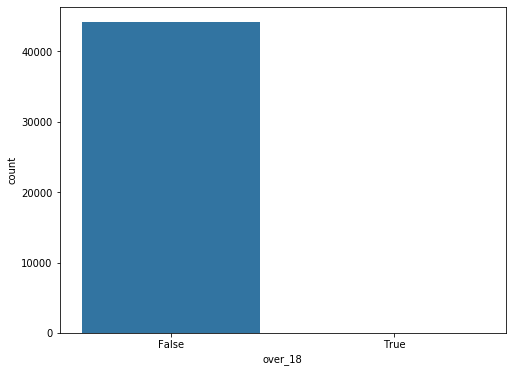

In [63]:
plt.figure(figsize=(8,6))
sns.countplot(x='over_18', data =reddit_data)

In [64]:
count_df = reddit_data.groupby(by=['score']).count().reset_index()
count_df= count_df.rename(columns={'author': 'number of users'})
count_df =count_df.iloc[:,[0,1]]
count_df.transpose()

0      1     2     3     4     5    6    7    8    9    10   \
score               0      1     2     3     4     5    6    7    8    9   10   
number of users  1173  25902  3790  2546  1145  1099  850  679  582  454  392   

                 11   12   13   14   15   16   17   18   19   20   21   22   \
score             11   12   13   14   15   16   17   18   19   20   21   22   
number of users  356  276  277  231  203  179  199  156  122  160  117  110   

                 23   24   25   26   27   28   29   30   31   32   33   34   \
score             23   24   25   26   27   28   29   30   31   32   33   34   
number of users  105  100   76   93   81   78   72   65   72   70   69   53   

                 35   36   37   38   39   40   41   42   43   44   45   46   \
score             35   36   37   38   39   40   41   42   43   44   45   46   
number of users   54   35   46   41   40   50   39   33   37   41   38   29   

                 47   48   49   50   51   52   53   54   55   56   57   58   \
score             47   48   49   50   51   52   53   54   55   56   57   58   
number of users   35   32   27   37   23   21   23   21   21   23   20   23   

                 59   60   61   62   63   64   65   66   67   68   69   70   \
score             59   60   61   62   63   64   65   66   67   68   69   70   
number of users   26   23   20   25   22   15   29   20   18   16   12   16   

                 71   72   73   74   75   76   77   78   79   80   81   82   \
score             71   72   73   74   75   76   77   78   79   80   81   82   
number of users   11   20   21   16   16   15   14    9   10   11   13   12   

                 83   84   85   86   87   88   89   90   91   92   93   94   \
score             83   84   85   86   87   88   89   90   91   92   93   94   
number of users   13   11    6   15    9   11   12   10   13    6   10   11   

                 95   96   97   98   99   100  101  102  103  104  105  106  \
score             95   96   97   98   99  100  101  102  103  104  105  106   
number of users    9   11    4    5    8   12    7    7    3    9    4    5   

                 107  108  109  110  111  112  113  114  115  116  117  118  \
score            107  108  109  110  111  112  113  114  115  116  117  118   
number of users    7    5    5    9    6    7    4    5    3    8    6    7   

                 119  120  121  122  123  124  125  126  127  128  129  130  \
score            119  120  121  122  123  124  125  126  127  128  129  130   
number of users    2    4    5    2    4    5    8    3    7    5    9    7   

                 131  132  133  134  135  136  137  138  139  140  141  142  \
score            131  132  133  134  135  136  137  138  139  140  141  142   
number of users    2    5    2    4    1    1    5    7    5    7    4    4   

                 143  144  145  146  147  148  149  150  151  152  153  154  \
score            143  144  145  146  147  148  149  150  151  152  153  154   
number of users    2    8    1    1    6    2    4    5    9    1    2    3   

                 155  156  157  158  159  160  161  162  163  164  165  166  \
score            155  156  158  159  160  161  162  163  164  165  166  167   
number of users    5    3    4    3    4    5    2    3    3    5    4    3   

                 167  168  169  170  171  172  173  174  175  176  177  178  \
score            168  169  170  171  172  173  174  175  176  178  179  180   
number of users    2    1    2    2    4    1    8    2    3    2    4    1   

                 179  180  181  182  183  184  185  186  187  188  189  190  \
score            181  182  183  184  185  186  187  188  189  192  193  194   
number of users    6    4    5    1    1    3    1    3    1    3    3    7   

                 191  192  193  194  195  196  197  198  199  200  201  202  \
score            195  196  197  198  199  200  201  202  203  204  205  207   
number of users    2    2    2    4    1    4 

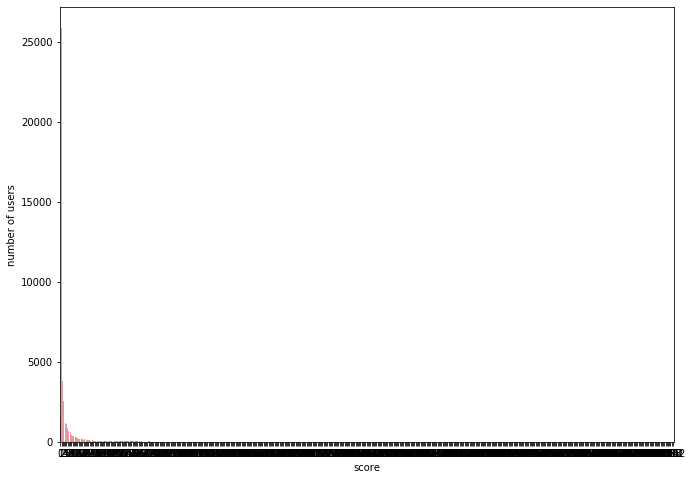

In [65]:
plt.figure(figsize=(11,8))
sns.barplot(x= 'score', y= 'number of users', data =count_df)

In [66]:
count_df = reddit_data.groupby(by=['num_comments']).count().reset_index()
count_df= count_df.rename(columns={'author': 'number of users'})
count_df =count_df.iloc[:,[0,1]]
count_df.transpose()

0     1     2     3     4     5     6     7     8    9  \
num_comments        0     1     2     3     4     5     6     7     8    9   
number of users  7085  8250  6877  3955  3177  2344  1972  1530  1211  948   

                  10   11   12   13   14   15   16   17   18   19   20   21  \
num_comments      10   11   12   13   14   15   16   17   18   19   20   21   
number of users  825  645  505  469  395  336  325  249  192  189  163  153   

                  22   23   24   25  26  27  28  29  30  31  32  33  34  35  \
num_comments      22   23   24   25  26  27  28  29  30  31  32  33  34  35   
number of users  163  126  125  115  99  90  78  79  72  55  64  70  59  50   

                 36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  \
num_comments     36  37  38  39  40  41  42  43  44  45  46  47  48  49  50   
number of users  37  35  42  43  43  26  36  29  44  30  33  40  25  31  31   

                 51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  \
num_comments     51  52  53  54  55  56  57  58  59  60  61  62  63  64  65   
number of users  26  22  17  20  17  22  16  16  11  15  15   9  12  22  12   

                 66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  \
num_comments     66  67  68  69  70  71  72  73  74  75  76  77  78  79  80   
number of users  17  12  10  17  13  11  11   7   9  10   8  13  12   6   3   

                 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  \
num_comments     81  82  83  84  85  86  87  88  89  90  91  92  93  94  95   
number of users   8   9   4  10   7   6   3   8   7   5   9   5  11   3   3   

                 96  97  98  99  100  101  102  103  104  105  106  107  108  \
num_comments     96  97  98  99  100  101  102  103  104  105  107  108  109   
number of users   5   5   3   3    4    1    2    1    3    1    3    2    2   

                 109  110  111  112  113  114  115  116  117  118  119  120  \
num_comments     110  111  112  113  114  115  116  117  118  119  120  121   
number of users    1    2    2    3    1    3    3    1    1    1    1    3   

                 121  122  123  124  125  126  127  128  129  130  131  132  \
num_comments     122  123  124  126  127  128  130  131  132  133  135  136   
number of users    1    1    1    1    1    2    1    2    1    1    2    1   

                 133  134  135  136  137  138  139  140  141  142  143  144  \
num_comments     139  142  146  147  148  152  153  157  158  163  164  165   
number of users    2    2    1    2    1    2    1    1    3    1    1    1   

                 145  146  147  148  149  150  151  152  153  154  155  156  \
num_comments     166  168  170  172  176  177  184  187  189  190  191  192   
number of users    1    1    1    1    1    1    1    2    1    1    1    2   

                 157  158  159  160  161  162  163  164  165  166  167  168  \
num_comments     195  196  197  201  204  207  209  212  214  215  240  257   
number of users    1    1    1    1    1    1    1    1    1    1    1    1   

                 169  170  171  172  173   174  
num_comments     272  275  327  390  396  2235  
number of users    1    1    1    1    1     1

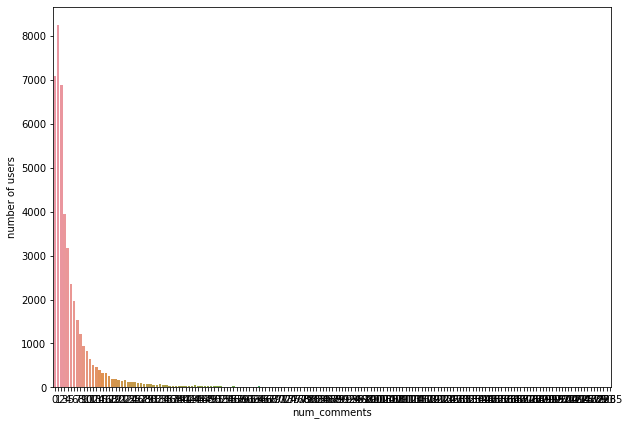

In [67]:
plt.figure(figsize=(10,7))
sns.barplot(x= 'num_comments', y= 'number of users', data =count_df)

In [68]:
reddit_data['selftext'].tail(5).to_list()

['Setting goals like “I’m going to work for x amount of hours every single day” can be a really tricky goal for the “procrastinator’s mind” because for your mind, that commitment of sitting down and working those hours FEELS like an eternity, and of course, your mind hates the idea of working on something that’s not entertaining for an eternity. When you are trapped in a procrastination downward spiral, your one and only goal should be to just start, forget about finishing your work or sitting down to work for 2 hours for now, you just want to sit down and work for a little bit, just enough to get that snowball rolling. \n\nA quick “fix” for this problem, is changing the frame of how you do the work. Divide your working time into smaller blocks of working time. For example, instead of telling yourself that you are going to sit down and work for a full hour, you tell yourself that you are going to work in 4 blocks of 15 minutes each with breaks in between. This makes committing to work 

In [69]:
reddit_data.tail(5)

author over_18  \
44437  TheSimranSingh   False   
44438     Jesse-Roses   False   
44439        witterss   False   
44440      lovebuggle   False   
44441       kenzkente   False   

                                                   title  \
44437  My advice on how to get out of a procrastinati...   
44438                          Wage War Within Yourself.   
44439  My need for validation makes it hard to grow +...   
44440                    Trying to improve my self care!   
44441                     how to go less harsh on myself   

                                                selftext  num_comments  score  \
44437  Setting goals like “I’m going to work for x am...             0      1   
44438  Within each of us there is a battle going on.....             1      1   
44439  I have struggled for so long needing the valid...             3      1   
44440  Not sure if this is allowed here but I'm looki...             1      1   
44441  Good greetings people, hope everyone is doing ...             0      1   

                                               full_link  created_utc  \
44437  https://www.reddit.com/r/selfimprovement/comme...   1590115751   
44438  https://www.reddit.com/r/selfimprovement/comme...   1590117554   
44439  https://www.reddit.com/r/selfimprovement/comme...   1590118035   
44440  https://www.reddit.com/r/selfimprovement/comme...   1590118833   
44441  https://www.reddit.com/r/selfimprovement/comme...   1590119088   

                timestamp  
44437 2020-05-21 22:49:11  
44438 2020-05-21 23:19:14  
44439 2020-05-21 23:27:15  
44440 2020-05-21 23:40:33  
44441 2020-05-21 23:44:48

In [70]:
reddit_data[reddit_data['selftext'].str.contains("improvement") == True].count()

author          3433
over_18         3433
title           3433
selftext        3433
num_comments    3433
score           3433
full_link       3433
created_utc     3433
timestamp       3433
dtype: int64

In [71]:
reddit_data[reddit_data['selftext'].str.contains("improvement") == True]['selftext'].head(1).to_list()

['I\'ve been on a huge self-improvement overhaul the last few months and I\'ve overcome many immediate obstacles--stopped drinking soda/caffeine, stopped biting my nails, have lost a little over 20lbs with more to come, started working more and keeping more productive, etc. The one thing I want to tackle next is the learned behaviors I have that are holding me back--primarily, with advocating for myself.\n\nI\'ve always been the type of person who likes to avoid conflict, even if it inconveniences me or goes against my morals. I\'ll say things I don\'t mean, agree to do things I don\'t want to do, etc., all because I don\'t have the self-assurance/confidence to say what it is that I really feel or want. I end up being very bitter about things even though they might not have happened if I had just spoken up about it, and I also apologize for nearly everything I do, even if it isn\'t my fault.\n\nI\'ve actively been working on not saying "sorry" for everything that I do, but I guess I\'m

In [72]:
reddit_data[reddit_data['selftext'].str.contains("positive") == True].count()

author          2248
over_18         2248
title           2248
selftext        2248
num_comments    2248
score           2248
full_link       2248
created_utc     2248
timestamp       2248
dtype: int64

In [73]:
reddit_data[reddit_data['selftext'].str.contains("positive") == True]['selftext'].tail(1).to_list()

['If ever there was one thing positive that came out of this quarantine, it\'s that we all got to recentre our compasses and re-evaluate ourselves much more than what we did in the past. However, I also feel as if some people are completely missing the point of self-improvement and have even started to distance themselves from people who care for them.\n\nMost of my (M19) friends have all told me that they are going through a period of self-improvement, self-development and trying to be a better person now but all of a sudden they became one-dimensional robots during this time. Friends who were funny in the past, all of a sudden are sullen and come across as completely crass. Case in point, a friend texted me recently and when I told him a joke that he would usually find funny, he hit me with a "no" and one-word text replies...like wth man. Another friend called me out for not watching a series he recommended me, once he found out I had free time (what the actual F lmao).\n\nFinally, a